 # <font color='orange'>Introducción al machine learning</font>

## Parte I

**1.** ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no
supervisado?

**R=** En el aprendizaje supervisado el modelo aprende de **datos etiquetados**, es decir cada entrada tiene una respuesta conocida , para estos se usa clasificación y regresión.

En el aprendizaje no supervisado el modelo aprende de **datos NO etiquetados**, es decir sin respuestas conocidas, debe encontrar patrones ocultos en los datos, para esto se usa Clustering y Reducción de dimensionalidad.

**2.** En la industria de la salud, a menudo se utiliza el machine learning para predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

**R=** Aprendizaje supervisado, ya que se conocen las etiquetas del conjunto de datos **(enfermo/no enfermo)**. En este caso, se aplicaría un método de clasificación para predecir el diagnóstico a partir de las variables de entrada.

**3.** ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?

**R=** Hay que dividir los datos porque necesitamos una parte para entrenar el modelo (training set) y otra para evaluar qué tan bien funciona con datos nuevos (test set). Esto permite saber si el modelo generaliza bien y no solo memorizó los datos.

**4.** ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?

**R=** En estadística, la regresión lineal se usa principalmente para explicar relaciones entre variables y entender el efecto de cada una. En machine learning, el enfoque es predecir con la mayor precisión posible, aunque no siempre se interpreten los coeficientes del modelo.

**5.** Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc). Menciona al menos 1 aplicación en esa industria de:

   a. Aprendizaje Supervisado (Clasificación)

   b. Aprendizaje Supervisado (Regresión)

   c. Aprendizaje No Supervisado (Clustering)

   d. Aprendizaje No Supervisado (Reducción de dimensionalidad)

**R=** En la industria de la musica

**Aprendizaje supervisados**

**a.** Clasificación: Clasificar canciones por género usando caractesisticas como; ritmo, tono, tempo.

**b.** Regresión: Predecir la popularidad de una canción (por ejemplo el número de reproducciónes en spotify) en variables como tiempo de reproducción y presencia en playlist.

**Aprendizaje NO supervisados**

**c.** Clustering: Agrupar usuarios con gustos musicales similares para crear playlists perzonalizadas o recomendaciones de artistas según sus gustos.

**d.** Reducción de dimensionalidad: Reducir características de audio para visualizar estilos musicales o mejorar recomendaciones.


# Parte II

En este ejemplo, utilizaremos Python y la biblioteca Scikit-learn para construir y entrenar nuestro modelo de regresión lineal. A continuación, se presenta un paso a paso para llevar a cabo este desafío:

**6.** Carga los datos de la base data_housing.csv e importa las librerías necesarias para cargar los datos en un DataFrame, manipularlos, hacer cálculos, analizarlos y construir modelos de regresión lineal. Utiliza Pandas, NumPy y Scikit-learn.

In [16]:
#Librerias que usaremos en primera instancia

import pandas as pd
import numpy as np

In [20]:
# Cargamos el archivo

df = pd.read_excel('data-housing.xlsx')

# Verificamos las primeras filas

print("Visualización de dataset:")
display(df.head())

Visualización de dataset:


,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


**7.** Genera un informe de calidad de datos de la base. Analiza la existencia de datos atípicos, extraños o nulos. Además, analiza las posibles correlaciones entre las variables.

In [23]:
# Dimensiones del dataset

df.shape

(545, 9)

In [25]:
# Tipo de datos y columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   guestroom        545 non-null    object
 6   hotwaterheating  545 non-null    object
 7   airconditioning  545 non-null    object
 8   parking          545 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.4+ KB


In [27]:
# Estadísticas generales

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
# Revisaremos outliers con IQR

columnas_numericas = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {outliers.shape[0]} posibles outliers")

price: 15 posibles outliers
area: 12 posibles outliers
bedrooms: 12 posibles outliers
bathrooms: 1 posibles outliers
stories: 41 posibles outliers
parking: 12 posibles outliers


El conjunto de datos cuenta con 545 registros y 9 columnas, las cuales incluyen tanto variables numéricas como categóricas, se verificó que no existen valores nulos, por lo que no fue necesario aplicar técnicas de imputación o limpieza por datos faltantes. Además, todas las variables presentan el tipo de dato adecuado para su análisis (enteros y objetos). El resumen estadístico permitió identificar posibles valores atípicos, debido a diferencias notables entre sus máximos y los valores de los percentiles. Para confirmar esto, se aplicó el método del rango intercuartil (IQR). 

Los valores extremos podrían influir en el modelamiento y deberán ser considerados según el enfoque elegido (mantener, transformar o eliminar).



In [32]:
# Correlación entre variables

correlacion_matriz = df.corr(numeric_only= True)

correlacion_matriz

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


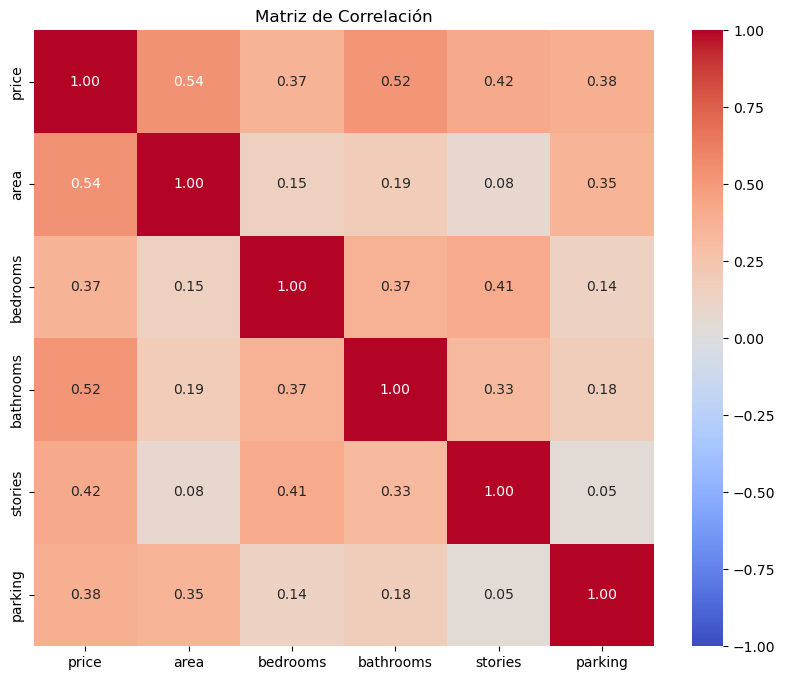

In [38]:
# Realizar heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()


En base al análisis de correlación, las variables que más influyen en el precio de una vivienda son el área total y la cantidad de baños. Estas serán especialmente relevantes para incluirlas en el modelo de regresión lineal.

**8.** Genera un modelo de regresión lineal. Para ello:

In [42]:
# a. Importamos el estimador de regresión lineal de Scikit-learn.

from sklearn.linear_model import LinearRegression

In [44]:
# b. Divide los datos (80% train y 20% test)

#importamos la función necesaria 

from sklearn.model_selection import train_test_split

# Variables independientes (X) y dependiente (y)

X = df[['area', 'bathrooms']]
y = df['price']

# Dividimos los datos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
# c. Crear instancia del modelo

modelo = LinearRegression()

In [48]:
# d. Ajusta el modelo utilizando los datos de entrenamiento.

modelo.fit(X_train, y_train)

LinearRegression()

**9.** Evalúa el modelo. Para ello:

In [51]:
# a. Utiliza los datos de entrenamiento y calcula métricas de evaluación, 
# como el error cuadrado medio (MSE) o el coeficiente de determinación (R^2). Grafica los coeficientes.

# Importamos funciones necesarias

from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones con los datos de entrenamientos

y_pred_train = modelo.predict(X_train)

# Calcular el Error Cuadrado Medio (MSE) y R²

# Error cuadrado medio
mse_train = mean_squared_error(y_train, y_pred_train)

# Coeficiente de determinación R^2
r2_train = r2_score(y_train, y_pred_train)

print("MSE (entrenamiento):", mse_train)
print("R² (entrenamiento):", r2_train)

MSE (entrenamiento): 1621587651049.2583
R² (entrenamiento): 0.4740897516736027


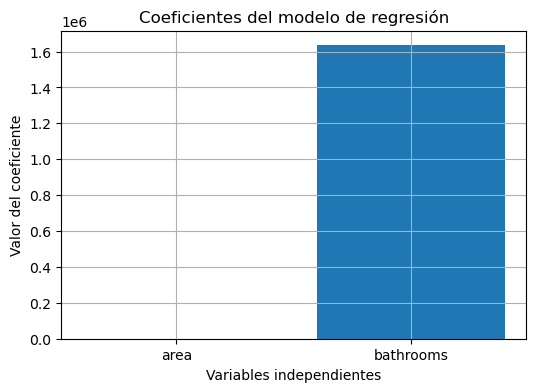

In [53]:
# Graficar los coeficientes del modelo

# Etiquetas de las variables
features = X_train.columns
coeficientes = modelo.coef_

# Crear gráfico de barras

plt.figure(figsize=(6, 4))
plt.bar(features, coeficientes)
plt.title("Coeficientes del modelo de regresión")
plt.ylabel("Valor del coeficiente")
plt.xlabel("Variables independientes")
plt.grid(True)
plt.show()

El gráfico de coeficientes muestra el peso relativo de las variables area y bathrooms en la predicción del precio de las propiedades. Se observa que bathrooms tiene un coeficiente significativamente mayor, lo que indica que, en este modelo, el número de baños tiene un impacto más fuerte sobre el precio estimado que el área total construida. Esta diferencia puede estar influenciada por la escala de las variables, ya que area se mide en valores numéricamente grandes, lo que reduce visualmente su coeficiente. A pesar de que ambas variables presentaban buena correlación con el precio, el modelo considera que un baño adicional incrementa más el valor de una propiedad que un aumento en el área.

In [56]:
# b. Utiliza los datos de prueba para realizar predicciones con el modelo entrenado, y evalúa el rendimiento del modelo comparando las predicciones
# con los valores reales.

# Realizar predicciones con el modelo entrenado

y_pred_test = modelo.predict(X_test)

# Calcular métricas de evaluación MSE y el R² con los datos de prueba

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("MSE (prueba):", mse_test)
print("R² (prueba):", r2_test)


MSE (prueba): 2885313513570.457
R² (prueba): 0.4291673924903032


Al evaluar el modelo con los datos de prueba, se obtuvo un MSE de aproximadamente 2.88 billones y un R² de 0.43, lo que indica que el modelo es capaz de explicar cerca del 43% de la variabilidad en los precios de las propiedades. Aunque el modelo logra captar parte de la relación entre las variables, su desempeño sugiere que podría mejorarse incorporando más variables relevantes, transformando características categóricas, o aplicando técnicas de regularización o escalamiento

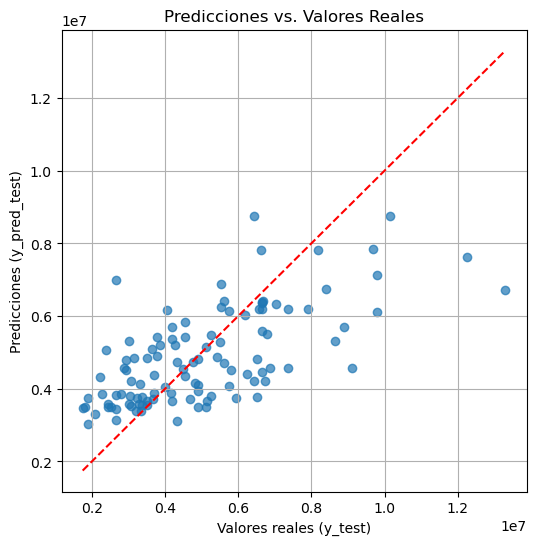

In [59]:
# Gráfico: Valores reales vs. predichos

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea de referencia ideal
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred_test)")
plt.title("Predicciones vs. Valores Reales")
plt.grid(True)
plt.show()

El gráfico de predicciones vs. valores reales muestra que el modelo capta correctamente la tendencia general del precio de las propiedades, aunque presenta una dispersión considerable, especialmente en precios altos. Esto indica que el modelo tiene una capacidad moderada de generalización, con mejores resultados en rangos medios. Aún hay margen de mejora para reducir los errores de predicción, posiblemente incorporando más variables relevantes o aplicando técnicas de ajuste más avanzadas.